In [47]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("../Datasets/Beispiel.xlsx")

### Tokenizer

In [ ]:
df['word_array'] = df["Kurztext Vrg."].apply(lambda x: x.split(" "))

### Modelltraining

eigentlich würden jetzt noch mehrere Pre-Processing Schritte folgen, wie Stemming oder das Entfernen von Stopwords, aber das würde mehr Wissen über den Business Context benötigen

In [16]:
sentences = np.array(df['word_array'])

In [17]:
model = Word2Vec(sentences, min_count=1)

In [18]:
print(model)

Word2Vec(vocab=347, vector_size=100, alpha=0.025)


In [20]:
words = list(model.wv.index_to_key)

In [21]:
print(words)

['-Sicht-', 'Befundung', 'und', 'zu', 'Geräteeingang', 'Geräteausgang', 'vor', 'ern.', 'durchführen', 'def.,', 'Zählerstandserfassung', 'defekt', 'Funktion,', 'Frist', 'jährliche', 'inst.', 'prüfen', 'ohne', 'links', 'WARTUNG', 'dok', 'FRIST', 'im', 'ern', 'do', 'Prüfung', '(F2)', 'B', 'gebrochen,', 'erneue', 'Reifen', 'dokumenti', 'F2', 'Motorhaube', 'dokumentieren', 'UVV-Prüfung', 'UVV', 'Jährliche', 'der', 'einstellen', 'Handbremshebel', 'an', 'erneuern.', 'hinten', 'Hinweis:', 'Schutz', '/', 'Inspektion', 'u', 'Rohrleitungen', 'def.', 'o.F.', 'fehlen,', 'lackieren.', 'Mehrzweckschaufel', 'i', 'Armlehne', 'macht', 'Vorderachse', 'innen', 'Aufnahme', 'Hydraulikschaltung', 'erneuern', 'Schlauchleitungen', 'Aufkleber', 'Div.', 'Klimaanlagenfrist', 'stark', 'Motorhalterung', 'WI', 'prüfen,', 'Lenksäulenverkleidung', 'nach', 'nicht,', 'Kennzeichenlampen', 'un', 'Diese', 'Bereich', 'Schlauchprüfung', 'Klimaservice', '500', 'Zusatzscheinwerfer', 'Kraftstoffundichtigkeit', 'BGR', 'F3', 'und

In [25]:
model.wv["Außenspiegel"] ## Word Embedding für Außenspiegel

array([-0.00296743,  0.00498068, -0.00162992, -0.00920764, -0.00326496,
        0.00677252,  0.00533652,  0.00450124,  0.00612991, -0.00920422,
        0.00106692,  0.00382787, -0.002436  , -0.00278235,  0.00639179,
       -0.00851926,  0.00334767,  0.00403759,  0.00200845,  0.00370497,
       -0.00660852,  0.00257722, -0.00155239, -0.00374219,  0.00882748,
       -0.00740368, -0.00754832, -0.0059853 , -0.00895049, -0.00186602,
       -0.00871571, -0.00426161,  0.0058727 , -0.002246  , -0.00610435,
       -0.00365985, -0.00713786,  0.00843201,  0.00354616, -0.00018721,
        0.00974311,  0.00740574, -0.00536831, -0.00786608,  0.00610374,
        0.005898  , -0.00264005,  0.00556485,  0.00884997,  0.00293793,
       -0.00566312, -0.00126037, -0.00711889,  0.00800986, -0.00475826,
        0.00420085,  0.00609955, -0.00076829, -0.00029396,  0.00796551,
       -0.00472958,  0.00994162,  0.00417597,  0.00337236, -0.00275934,
       -0.00325207, -0.00419448, -0.00735375,  0.00658295, -0.00

### Word Embeddings plotten

In [30]:
X = model.wv[model.wv.index_to_key]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

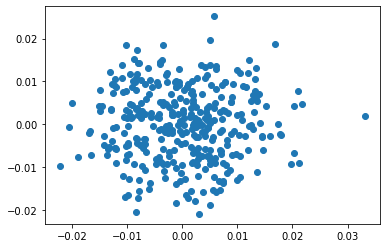

In [32]:
plt.scatter(result[:,0], result[:,1])

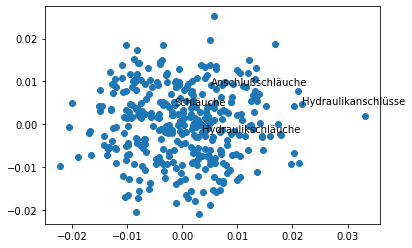

In [43]:
plt.scatter(result[:,0],result[:,1])
words = ["Hydraulikschläuche","Hydraulikanschlüsse","Schläuche","Anschlußschläuche"]
#words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

### Laden eines Vortrainierten Modells

In [ ]:
model = KeyedVectors.load_word2vec_format("../Modelle/cc.10kmini_de.300.vec")

Mit dem Modell können auch arithmetische Operationen ausgeführt werden. Beispielsweise (König - Mann) + Frau = ?

In [49]:
model.most_similar(positive=['Frau','König'], negative=['Mann'],topn=1)

[('Königin', 0.6669719219207764)]

In [52]:
model.most_similar(positive=['Stuhl','Tisch'], topn=1)

[('Sofa', 0.6547176837921143)]

In [66]:
model.similarity("Auto","Motorrad")

0.68957716

In [80]:
model.similarity("Fußball","Sport")

0.6279824

In [81]:
model.similarity("blau","Farbe")

0.53690225

In [84]:
model.similarity("Auto","Stuhl")

0.26180625